#FA 5 - Cristobal

In [41]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

##Item 8.18

In [6]:
samples = [
    (9, 9),
    (9, 12),
    (9, 15),
    (12, 9),
    (12, 12),
    (12, 15),
    (15, 9),
    (15, 12),
    (15, 15)
]

df = pd.DataFrame(samples, columns=['Sample1', 'Sample2'])

In [7]:
df

,Sample1,Sample2
0,9,9
1,9,12
2,9,15
3,12,9
4,12,12
5,12,15
6,15,9
7,15,12
8,15,15


In [8]:
df['Mean'] = df.mean(axis=1)

In [10]:
df['xbar'] = df['Mean'].drop_duplicates().reset_index(drop=True)

In [12]:
df['p(xbar)'] = df['xbar'].apply(lambda x: (df['Mean'] == x).sum() / len(df))

In [14]:
df['xbar * p(xbar)'] = df['xbar'] * df['p(xbar)']
df['xbar^2 * p(xbar)'] = df['xbar'] ** 2 * df['p(xbar)']

In [15]:
df

,Sample1,Sample2,Mean,xbar,p(xbar),xbar * p(xbar),xbar^2 * p(xbar)
0,9,9,9.0,9.0,0.111111,1.000000,9.0
1,9,12,10.5,10.5,0.222222,2.333333,24.5
2,9,15,12.0,12.0,0.333333,4.000000,48.0
3,12,9,10.5,13.5,0.222222,3.000000,40.5
4,12,12,12.0,15.0,0.111111,1.666667,25.0
5,12,15,13.5,NaN,0.000000,NaN,NaN
6,15,9,12.0,NaN,0.000000,NaN,NaN
7,15,12,13.5,NaN,0.000000,NaN,NaN
8,15,15,15.0,NaN,0.000000,NaN,NaN


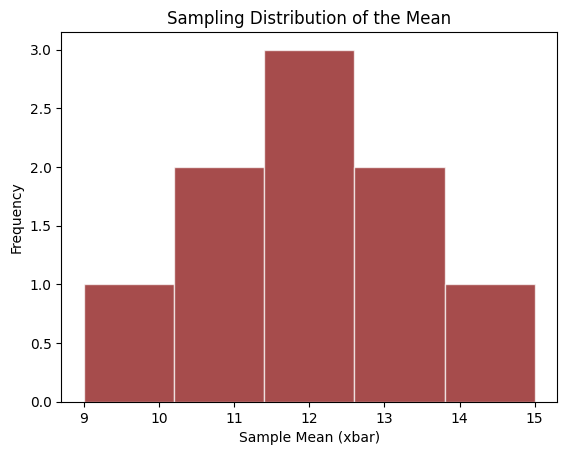

In [27]:
plt.hist(df['Mean'], bins=5, color='maroon', edgecolor='white', alpha=0.7)
plt.xlabel('Sample Mean (xbar)')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Mean')
plt.grid(False)
plt.show()

##Item 8.21
A population consists of the four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be
drawn with replacement from this population. Find (a) the population mean, (b) the population standard deviation, (c) the mean of the sampling distribution of means, and (d ) the standard deviation of the sampling
distribution of means. Verify parts (c) and (d ) directly from (a) and (b) by using suitable formulas.

In [29]:
population = np.array([3, 7, 11, 15])
n = 2

In [30]:
population_mean = np.mean(population)
print(f"Population Mean (μ): {population_mean}")

Population Mean (μ): 9.0


In [37]:
population_std_dev = np.std(population)
print(f"Population Standard Deviation (σ): {population_std_dev}")

Population Standard Deviation (σ): 4.47213595499958


In [38]:
sampling_distribution_mean = population_mean
print(f"Mean of Sampling Distribution of Means (μx̄): {sampling_distribution_mean}")

Mean of Sampling Distribution of Means (μx̄): 9.0


In [40]:
sampling_distribution_std_dev = population_std_dev / np.sqrt(n)
print(f"Standard Deviation of Sampling Distribution of Means (σx̄): {sampling_distribution_std_dev}")

Standard Deviation of Sampling Distribution of Means (σx̄): 3.162277660168379


##Item 8.34
Find the probability that of the next 200 children born, (a) less than 40% will be boys, (b) between 43% and
57% will be girls, and (c) more than 54% will be boys. Assume equal probabilities for the births of boys and
girls.

In [42]:
n = 200
p = 0.5

In [43]:
prob_less_than_40_percent_boys = sum(stats.binom.pmf(k, n, p) for k in range(80))
print(f"(a) Probability that less than 40% will be boys: {prob_less_than_40_percent_boys}")

(a) Probability that less than 40% will be boys: 0.0018174739762649634


In [44]:
prob_between_43_and_57_percent_girls = sum(stats.binom.pmf(k, n, p) for k in range(86, 115))
print(f"(b) Probability between 43% and 57% will be girls: {prob_between_43_and_57_percent_girls}")

(b) Probability between 43% and 57% will be girls: 0.9599628083866002


In [45]:
prob_more_than_54_percent_boys = 1 - sum(stats.binom.pmf(k, n, p) for k in range(109))
print(f"(c) Probability that more than 54% will be boys: {prob_more_than_54_percent_boys}")

(c) Probability that more than 54% will be boys: 0.11462329862985798


##Item 8.49
The credit hour distribution at Metropolitan Technological College is as follows:
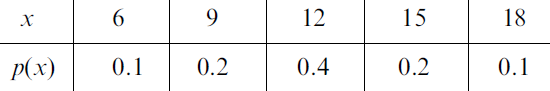

Find Find μ and σ^2. Give the 25 (with replacement) possible samples of size 2, their means, and their
probabilities.

In [47]:
x_values = [6, 9, 12, 15, 18]
p_values = [0.1, 0.2, 0.4, 0.2, 0.1]

In [48]:
mu = sum(x * p for x, p in zip(x_values, p_values))
sigma_squared = sum(((x - mu) ** 2) * p for x, p in zip(x_values, p_values))

In [50]:
print(f"μ is: {mu}, σ^2 is: {sigma_squared}")

μ is: 12.000000000000002, σ^2 is: 10.8


In [51]:
import itertools

pairs = list(itertools.product(x_values, repeat=2))
means = [(x1 + x2) / 2 for x1, x2 in pairs]
probabilities = [p_values[x_values.index(x1)] * p_values[x_values.index(x2)] for x1, x2 in pairs]

possible_samples = pd.DataFrame({
    'Pair': pairs,
    'Mean': means,
    'Probability': probabilities
})

In [52]:
possible_samples

,Pair,Mean,Probability
0,"(6, 6)",6.0,0.01
1,"(6, 9)",7.5,0.02
2,"(6, 12)",9.0,0.04
3,"(6, 15)",10.5,0.02
4,"(6, 18)",12.0,0.01
5,"(9, 6)",7.5,0.02
6,"(9, 9)",9.0,0.04
7,"(9, 12)",10.5,0.08
8,"(9, 15)",12.0,0.04
9,"(9, 18)",13.5,0.02
